In [2]:
import pandas as pd
import sys
sys.path.append("/home/ana/workshop2/src/")
#import db_connection
from db_connection import conn

In [7]:
df_grammys_raw=pd.read_sql(sql="SELECT * FROM grammys",con=conn().connect())

In [8]:
#analysis of the data type of my variables
df_grammys_raw.dtypes

year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object

In [9]:
#How many variables and observations do we have in the data set?
df_grammys_raw.shape

(4810, 10)

In [10]:
# Check for missing data in the dataset
missing_data = df_grammys_raw.isnull().sum()
missing_data,

(year               0
 title              0
 published_at       0
 updated_at         0
 category           0
 nominee            6
 artist          1840
 workers         2190
 img             1367
 winner             0
 dtype: int64,)

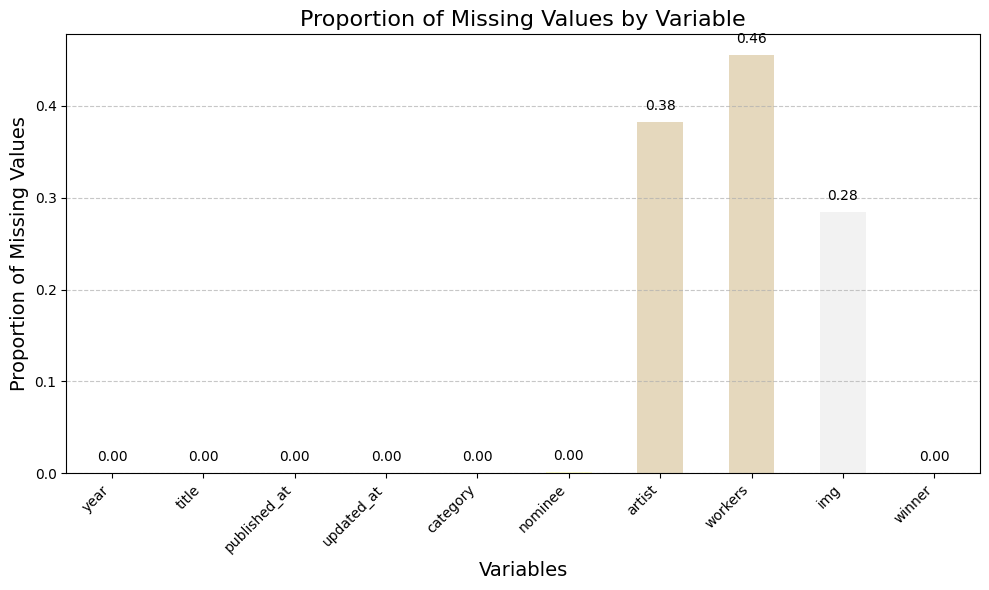

In [12]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/home/ana/workshop2/src/")
from db_connection import conn

# Perform the query and save the result in a DataFrame
df_grammys = pd.read_sql_query(sql="SELECT * FROM grammys", con=conn().connect())

# Calculate the proportion of null values for each variable
missing_proportion = df_grammys.isnull().mean()

# Create a bar graph with different pastel colors
colors = plt.cm.Pastel1(np.linspace(0, 1, len(missing_proportion)))

plt.figure(figsize=(10, 6))
bars = missing_proportion.plot(kind='bar', color=colors, figsize=(10, 6))

# Add value labels on top of each bar
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f"{bar.get_height():.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Customize plot appearance
plt.title('Proportion of Missing Values by Variable', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Proportion of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show graph
plt.show()


In [13]:
#duplicate analysis
duplicados = df_grammys_raw.duplicated()
duplicados.sum()



np.int64(0)

In [17]:
# Statistical analysis

# For the 'year' column (numerical)
year_stats = df_grammys_raw['year'].describe()

# For the 'category' column (categorical), get mode and number of unique categories
category_mode = df_grammys_raw['category'].mode()[0]
unique_categories = df_grammys_raw['category'].nunique()

# For the 'nominee' column (categorical), get mode and number of unique nominees
nominee_mode = df_grammys_raw['nominee'].mode()[0]
unique_nominees = df_grammys_raw['nominee'].nunique()

# For the 'artist' column (categorical), get mode and number of unique artists
artist_mode = df_grammys_raw['artist'].mode()[0]
unique_artists = df_grammys_raw['artist'].nunique()

# For the 'winner' column (boolean), percentage of winners
winner_stats = df_grammys_raw['winner'].value_counts(normalize=True) * 100

# Display the obtained results
year_stats, category_mode, unique_categories, nominee_mode, unique_nominees, artist_mode, unique_artists, winner_stats


(count    4810.000000
 mean     1995.566944
 std        17.149720
 min      1958.000000
 25%      1983.000000
 50%      1998.000000
 75%      2010.000000
 max      2019.000000
 Name: year, dtype: float64,
 'Song Of The Year',
 638,
 'Berlioz: Requiem',
 4131,
 '(Various Artists)',
 1658,
 winner
 True    100.0
 Name: proportion, dtype: float64)

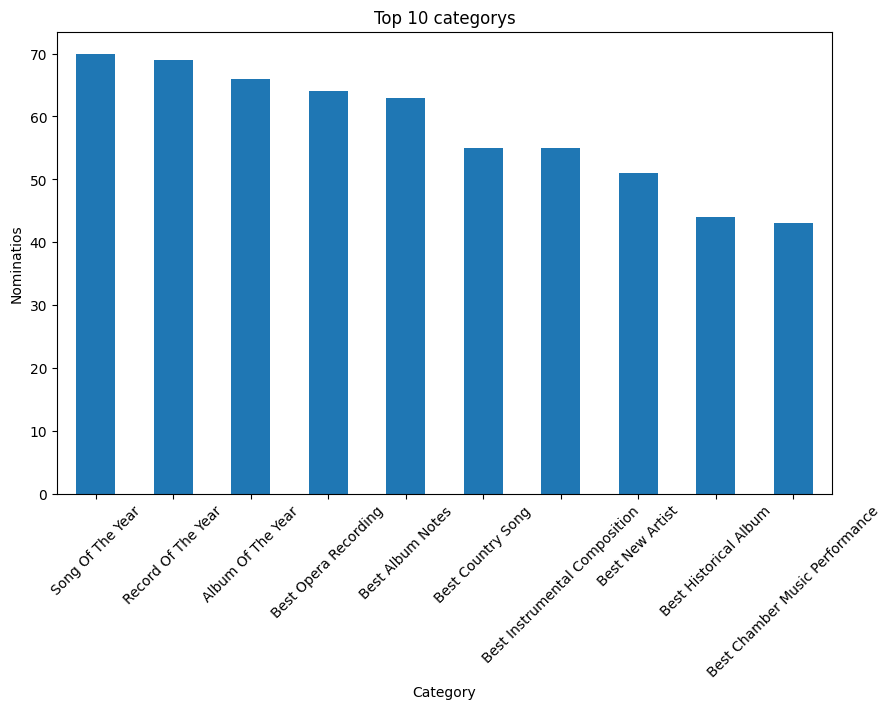

In [26]:
import matplotlib.pyplot as plt

# Distribution of the most frequent categories
category_counts = df_grammys_raw['category'].value_counts().head(10)



# Create graph of the 10 most frequent categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Top 10 categorys')
plt.ylabel('Nominatios')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


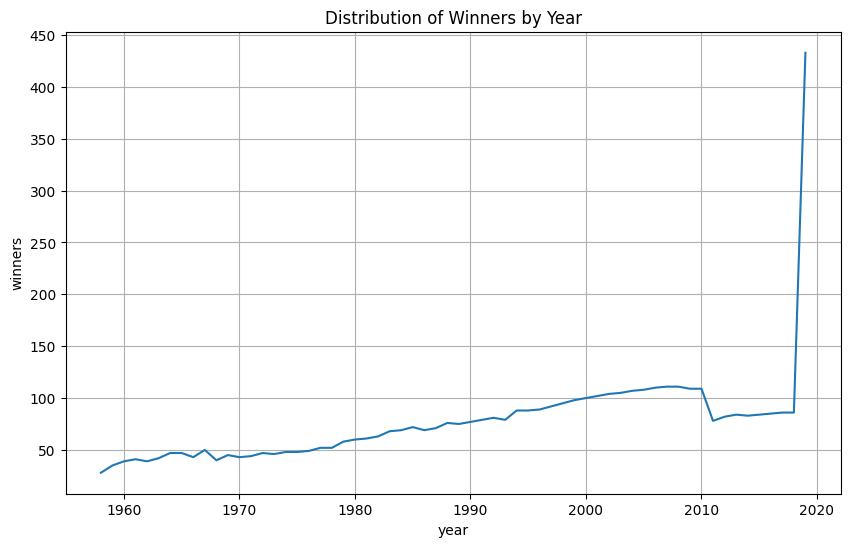

In [25]:
import matplotlib.pyplot as plt

# winners by year
winners_by_year = df_grammys_raw.groupby('year').size()



# graph winners by year
plt.figure(figsize=(10, 6))
winners_by_year.plot(kind='line')
plt.title('Distribution of Winners by Year')
plt.ylabel('winners')
plt.xlabel('year')
plt.grid(True)
plt.show()

/tmp/ipykernel_5055/590435613.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  bars = plt.bar(artist_nominations.index, artist_nominations, color=plt.cm.get_cmap('tab10').colors)


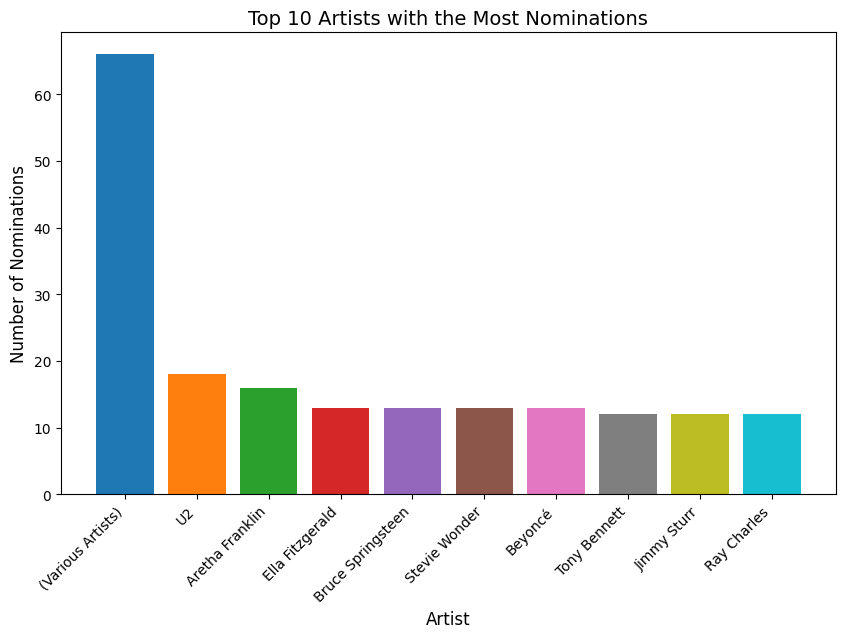

In [28]:
import matplotlib.pyplot as plt

# Count the number of nominations per artist
artist_nominations = df_grammys_raw['artist'].value_counts().head(10)

# Create a bar chart to visualize the top 10 artists with the most nominations
plt.figure(figsize=(10, 6))
bars = plt.bar(artist_nominations.index, artist_nominations, color=plt.cm.get_cmap('tab10').colors)

# Add a title and labels
plt.title('Top 10 Artists with the Most Nominations', fontsize=14)
plt.ylabel('Number of Nominations', fontsize=12)
plt.xlabel('Artist', fontsize=12)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

/tmp/ipykernel_5055/1765271589.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  bars = plt.bar(song_nominations.index, song_nominations, color=plt.cm.get_cmap('tab10').colors)


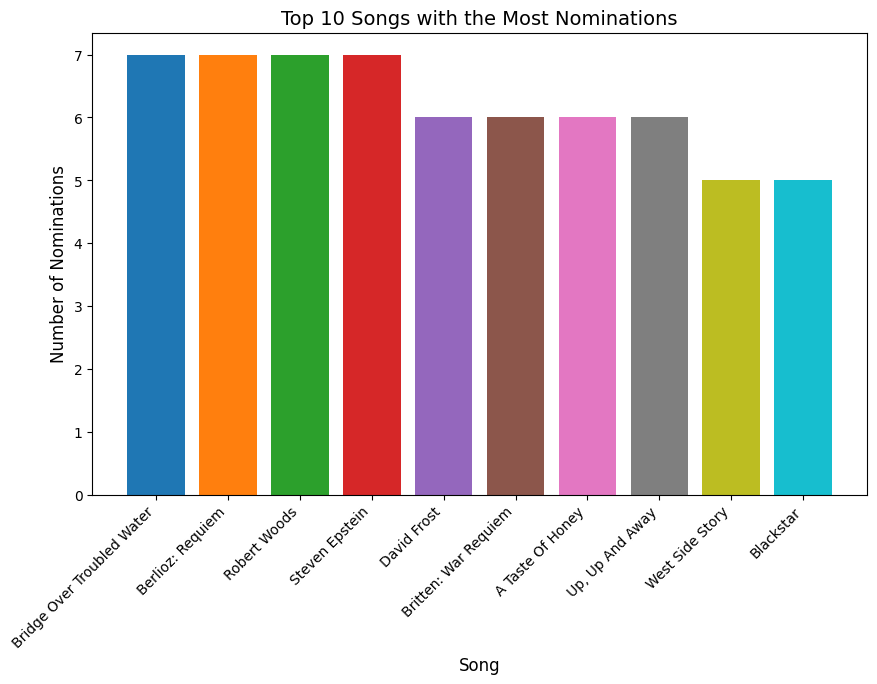

In [30]:
# Count the number of nominations per song (title)
song_nominations = df_grammys_raw['nominee'].value_counts().head(10)

# Create a bar chart to visualize the top 10 songs with the most nominations
plt.figure(figsize=(10, 6))
bars = plt.bar(song_nominations.index, song_nominations, color=plt.cm.get_cmap('tab10').colors)

# Add a title and labels
plt.title('Top 10 Songs with the Most Nominations', fontsize=14)
plt.ylabel('Number of Nominations', fontsize=12)
plt.xlabel('Song', fontsize=12)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

In [31]:
# Normalize columns to uppercase, except 'winner' and numeric columns
df_normalized = df_grammys_raw.copy()

# Apply uppercasing only to object type columns, excluding 'winner'
columns_to_normalize = df_normalized.select_dtypes(include='object').columns
columns_to_normalize = [col for col in columns_to_normalize if col != 'winner']

# Normalize the columns
df_normalized[columns_to_normalize] = df_normalized[columns_to_normalize].apply(lambda x: x.str.upper())

# Display the first few rows of the normalized dataset
df_normalized.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62ND ANNUAL GRAMMY AWARDS (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,RECORD OF THE YEAR,BAD GUY,BILLIE EILISH,"FINNEAS O'CONNELL, PRODUCER; ROB KINELSKI & FI...",HTTPS://WWW.GRAMMY.COM/SITES/COM/FILES/STYLES/...,True
1,2019,62ND ANNUAL GRAMMY AWARDS (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,RECORD OF THE YEAR,"HEY, MA",BON IVER,"BJ BURTON, BRAD COOK, CHRIS MESSINA & JUSTIN V...",HTTPS://WWW.GRAMMY.COM/SITES/COM/FILES/STYLES/...,True
2,2019,62ND ANNUAL GRAMMY AWARDS (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,RECORD OF THE YEAR,7 RINGS,ARIANA GRANDE,"CHARLES ANDERSON, TOMMY BROWN, MICHAEL FOSTER ...",HTTPS://WWW.GRAMMY.COM/SITES/COM/FILES/STYLES/...,True
3,2019,62ND ANNUAL GRAMMY AWARDS (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,RECORD OF THE YEAR,HARD PLACE,H.E.R.,"RODNEY “DARKCHILD” JERKINS, PRODUCER; JOSEPH H...",HTTPS://WWW.GRAMMY.COM/SITES/COM/FILES/STYLES/...,True
4,2019,62ND ANNUAL GRAMMY AWARDS (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,RECORD OF THE YEAR,TALK,KHALID,"DISCLOSURE & DENIS KOSIAK, PRODUCERS; INGMAR C...",HTTPS://WWW.GRAMMY.COM/SITES/COM/FILES/STYLES/...,True


In [32]:
#null nominee
null_nominee = df_grammys_raw[df_grammys_raw["nominee"].isnull()]
null_nominee

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
2274,2000,43rd Annual GRAMMY Awards (2000),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,"Remixer of the Year, Non-Classical",None,None,None,None,True
2372,1999,42nd Annual GRAMMY Awards (1999),2017-11-28T00:03:45-08:00,2019-09-10T01:09:02-07:00,"Remixer Of The Year, Non-Classical",None,None,None,None,True
2464,1998,41st Annual GRAMMY Awards (1998),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,"Remixer Of The Year, Non-classical",None,None,None,None,True
2560,1997,40th Annual GRAMMY Awards (1997),2017-11-28T00:03:45-08:00,2019-09-10T01:07:37-07:00,"Remixer Of The Year, Non-Classical",None,None,None,None,True
4527,1965,8th Annual GRAMMY Awards (1965),2017-11-28T00:03:45-08:00,2019-09-10T01:06:59-07:00,Best New Country & Western Artist,None,None,None,None,True
4574,1964,7th Annual GRAMMY Awards (1964),2017-11-28T00:03:45-08:00,2019-09-10T01:06:11-07:00,Best New Country & Western Artist Of 1964,None,None,None,None,True


In [33]:
#data null columns:
clean_df_grammy = df_grammys_raw[df_grammys_raw["category"].str.startswith("REMIXER")]
clean_df_grammy
clean_df_grammy = df_grammys_raw[df_grammys_raw["category"].str.startswith("BEST NEW COUNTRY &")]
clean_df_grammy
df_grammys_raw.drop([2261,2359,2454,2547,4525,4573], axis=0, inplace=True)
df_grammys_raw


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True
...,...,...,...,...,...,...,...,...,...,...
4805,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,None,"Van Cliburn, artist (Symphony Of The Air Orche...",None,True
4806,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,None,"Andres Segovia, artist",https://www.grammy.com/sites/com/files/styles/...,True
4807,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,None,"Hollywood String Quartet (Alvin Dinkin, Paul S...",None,True
4808,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,None,None,None,True


In [34]:
null_artist = df_grammys_raw[df_grammys_raw["artist"].isnull()]
null_artist

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
16,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bad Guy,None,"Billie Eilish O'Connell & Finneas O'Connell, s...",https://www.grammy.com/sites/com/files/styles/...,True
17,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Always Remember Us This Way,None,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lo...",https://www.grammy.com/sites/com/files/styles/...,True
18,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bring My Flowers Now,None,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth ...",https://www.grammy.com/sites/com/files/styles/...,True
19,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Hard Place,None,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris...",https://www.grammy.com/sites/com/files/styles/...,True
20,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Lover,None,"Taylor Swift, songwriter (Taylor Swift)",https://www.grammy.com/sites/com/files/styles/...,True
...,...,...,...,...,...,...,...,...,...,...
4805,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,None,"Van Cliburn, artist (Symphony Of The Air Orche...",None,True
4806,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,None,"Andres Segovia, artist",https://www.grammy.com/sites/com/files/styles/...,True
4807,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,None,"Hollywood String Quartet (Alvin Dinkin, Paul S...",None,True
4808,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,None,None,None,True


In [35]:
#delete innecesary columns


df_grammys_raw.drop(['img', 'title', 'published_at', 'updated_at', 'workers'], axis=1, inplace=True)
df_grammys_raw



,year,category,nominee,artist,winner
0,2019,Record Of The Year,Bad Guy,Billie Eilish,True
1,2019,Record Of The Year,"Hey, Ma",Bon Iver,True
2,2019,Record Of The Year,7 rings,Ariana Grande,True
3,2019,Record Of The Year,Hard Place,H.E.R.,True
4,2019,Record Of The Year,Talk,Khalid,True
...,...,...,...,...,...
4805,1958,Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,None,True
4806,1958,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,None,True
4807,1958,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,None,True
4808,1958,Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,None,True


In [36]:
#true to nominee
df_grammys_raw['winner'] = df_grammys_raw['winner'].map({True: 1, False: 0})

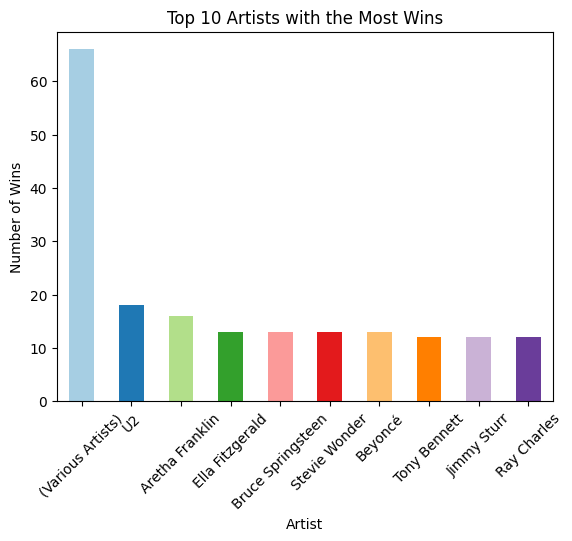

In [44]:
artist_wins = df_grammys_raw[df_grammys_raw['winner'] == True]['artist'].value_counts().head(10)
artist_wins.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Top 10 Artists with the Most Wins')
plt.ylabel('Number of Wins')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.show()